In [41]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import os
import pandas as pd
import random
from skimage import io
from shutil import copyfile
import sys
import time
import SimpleITK as sitk
import scipy.ndimage


import tensorflow as tf
from tensorflow import keras

In [42]:
candidates_file = r'C:\Users\user\Downloads\pfa\CSVFILES\candidates_V2.csv'
candidates_table = pd.read_csv(candidates_file)

annotations_file = r'C:\Users\user\Downloads\pfa\CSVFILES\annotations(1).csv'
annotations_table = pd.read_csv(annotations_file)

seriesuid_file = r'C:\Users\user\Downloads\pfa\CSVFILES\seriesuid.csv'
seriesuid_table = pd.read_csv(annotations_file)

In [43]:
def get_voxel(x,y,z,new_spacing,new_origin):
        #Converts Cartesian to voxel coordinates        
        xx=(x-new_origin[2])/new_spacing[2]
        yy=(y-new_origin[1])/new_spacing[1]
        zz=(z-new_origin[0])/new_spacing[0]
        return (xx,yy,zz)

In [44]:
'''
def crop_class1(img_id):
    #return crop images class 1
    class1=[]
        
    for index, row in annotations_table.iterrows() :
            img_id=row['seriesuid']
            img_ITK=sitk.ReadImage('C:/Users/user/Downloads/pfa/dataset/'+ img_id + '.mhd' )
            img_np= sitk.GetArrayFromImage(img_ITK)
            x=row['coordX']
            y=row['coordY']
            z=row['coordZ']
            (xx,yy,zz)=get_voxel(img_ITK,x,y,z)
            xx=int(xx)
            yy=int(yy)
            zz=int(zz)
            x_min=xx-16
            x_max=xx+16
            y_min=yy-16
            y_max=yy+16
            image=img_np[zz]
            img_crop = image[y_min:y_max, x_min:x_max]
            class1=class1+[img_crop]
            #save
            print(index)
            
        
    print('Done for all!')
    return(class1) 
    '''

"\ndef crop_class1(img_id):\n    #return crop images class 1\n    class1=[]\n        \n    for index, row in annotations_table.iterrows() :\n            img_id=row['seriesuid']\n            img_ITK=sitk.ReadImage('C:/Users/user/Downloads/pfa/dataset/'+ img_id + '.mhd' )\n            img_np= sitk.GetArrayFromImage(img_ITK)\n            x=row['coordX']\n            y=row['coordY']\n            z=row['coordZ']\n            (xx,yy,zz)=get_voxel(img_ITK,x,y,z)\n            xx=int(xx)\n            yy=int(yy)\n            zz=int(zz)\n            x_min=xx-16\n            x_max=xx+16\n            y_min=yy-16\n            y_max=yy+16\n            image=img_np[zz]\n            img_crop = image[y_min:y_max, x_min:x_max]\n            class1=class1+[img_crop]\n            #save\n            print(index)\n            \n        \n    print('Done for all!')\n    return(class1) \n    "

In [45]:
def resample(image, old_spacing, new_spacing=[1, 1, 1]):
    
    resize_factor = old_spacing / new_spacing
    new_real_shape = image.shape * resize_factor
    new_shape = np.round(new_real_shape)
    real_resize_factor = new_shape / image.shape
    new_spacing = old_spacing / real_resize_factor

    image = scipy.ndimage.interpolation.zoom(image, real_resize_factor, mode = 'nearest')
    
    return image, new_spacing

In [46]:
def crop_class1(img_id):
    #return crop images class 1
    class1=[]
    img_ITK=sitk.ReadImage('C:/Users/user/Downloads/pfa/dataset/'+ img_id + '.mhd')
    img_np = sitk.GetArrayFromImage(img_ITK)

    origin = np.array(img_ITK.GetOrigin())[::-1] # get [z, y, x] origin
    old_spacing = np.array(img_ITK.GetSpacing())[::-1] # get [z, y, x] spacing
    img_np, new_spacing = resample(img_np, old_spacing)

    bboxs = candidates_table[candidates_table['seriesuid']==img_id] 
    for index, row in bboxs.iterrows() :
        if row['class']==1 :
            x=row['coordX']
            y=row['coordY']
            z=row['coordZ']
            (xx,yy,zz)=get_voxel(x,y,z,new_spacing,origin)
            xx=int(xx)
            yy=int(yy)
            zz=int(zz)
            x_min=xx-16
            x_max=xx+16
            y_min=yy-16
            y_max=yy+16
            image=img_np[zz]
            img_crop = image[y_min:y_max, x_min:x_max]
            class1=class1+[img_crop]
            
       
            
            
        
    #print('Done for all!')
    return(class1) 
    

In [53]:

class1=[]
for index, row in seriesuid_table.iterrows() :
    if index<3 :
        class1=class1+crop_class1(row.seriesuid)
        print(index)
    else : 
        break
print('fin')
print(str(len(class1)))

0
1
2
5


In [36]:
print(str(len(class1)))

276


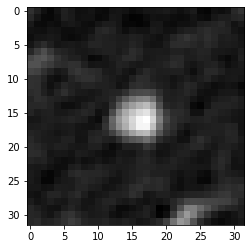

In [69]:
plt.imshow(class1[2])
plt.axis("on")
plt.gray()
plt.show()

In [65]:
def get_voxel(self,x,y,z):
        """
        Converts Cartesian to voxel coordinates
        """
        origin = self.GetOrigin()
        resolution = self.GetSpacing()
        xx=(x-origin[0])/resolution[0]
        yy=(y-origin[1])/resolution[1]
        zz=(z-origin[2])/resolution[2]
        return (xx,yy,zz)







def crop_class1(img_id):
    #return crop images class 1
    class1=[]
    img_ITK=sitk.ReadImage('C:/Users/user/Downloads/pfa/dataset/'+ img_id + '.mhd')
    img_np = sitk.GetArrayFromImage(img_ITK)

   

    bboxs = candidates_table[candidates_table['seriesuid']==img_id] 
    for index, row in bboxs.iterrows() :
        if row['class']==1 :
            x=row['coordX']
            y=row['coordY']
            z=row['coordZ']
            (xx,yy,zz)=get_voxel(img_ITK,x,y,z)
            xx=int(xx)
            yy=int(yy)
            zz=int(zz)
            x_min=xx-16
            x_max=xx+16
            y_min=yy-16
            y_max=yy+16
            image=img_np[zz]
            img_crop = image[y_min:y_max, x_min:x_max]
            class1=class1+[img_crop]
            
       
            
            
        
    #print('Done for all!')
    return(class1) 
    




class1=[]
for index, row in seriesuid_table.iterrows() :
    if index<3 :
        class1=class1+crop_class1(row.seriesuid)
        print(index)
    else : 
        break
print('fin')
print(str(len(class1)))

0
1
2
fin
5


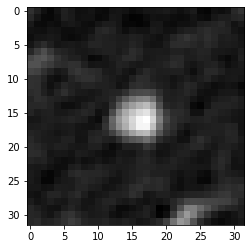

In [68]:
plt.imshow(class1[2])
plt.axis("on")
plt.gray()
plt.show()

In [11]:
'''
def crop_class0(i):
    #return crop images class 0
    class0=[]
    
    for index, row in candidates_table.iterrows() :
       i=index
       if i<30 :
            if row['class']==0 :
                img_id=row['seriesuid']
                img_ITK=sitk.ReadImage('C:/Users/user/Downloads/pfa/dataset/'+ img_id + '.mhd', sitk.sitkFloat32)
                img_np= sitk.GetArrayFromImage(img_ITK)
                x=row['coordX']
                y=row['coordY']
                z=row['coordZ']
                (xx,yy,zz)=get_voxel(img_ITK,x,y,z)
                xx=int(xx)
                yy=int(yy)
                zz=int(zz)
                x_min=xx-16
                x_max=xx+16
                y_min=yy-16
                y_max=yy+16
                image=img_np[zz]
                img_crop = image[y_min:y_max, x_min:x_max]
                class0=class0+[img_crop]

        
    print('Done for all!')
    return(class0) 
    

In [8]:
'''
class0=crop_class0(30)
print(str(len(class0)))


Done for all!
30


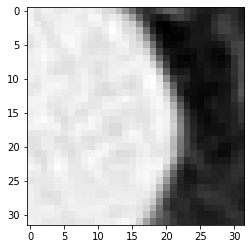

In [9]:
'''plt.imshow(class0[5])
plt.axis("on")
plt.gray()
plt.show()